In [1]:
%matplotlib inline
import os
import glob
import csv
import re
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import pywt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from mpl_toolkits.mplot3d import Axes3D 
from scipy import signal
from scipy.signal import find_peaks
from scipy import optimize
from scipy.stats import linregress, stats
import seaborn as sns

import datetime as dt
from textwrap import wrap


# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
os.getcwd()

'C:\\Users\\bina_\\Dropbox\\Robina Shaheen_PEMS2022\\PEMS_NOx_BC_CO2_ALPR\\ii.dwt'

In [8]:
df1 = pd.read_csv('./Results2/BC_peakarea_ts_index_merge.csv')
df2 = pd.read_csv('./Results2/IR_BC1_ug_denoised_s6_ts_index.csv')

# df2.drop(['unnamed'], axis=1)
# del df2[df2.columns[0]]
df1.drop(df1.columns[[0, 7]], axis=1, inplace=True)

# print(len(df1))
# print(len(df2))
print(df2.dtypes)
print(df1.head())
print(df2.head())

index        int64
BC_conc    float64
time2       object
dtype: object
        BC_HW    BC_p_h  BC (ug/m3)        BC_EF       BC_t1 BC_actual_TS
0   15.303044  1.332635   20.393379   210.459674   90.388004      0:03:19
1  115.619496  1.672673  193.393660  1995.822575  220.139496      0:05:25
2   61.047133  1.547732   94.484616   975.081242  416.517110      0:08:40
3    4.549916  1.548507    7.045576    72.710343  554.026663      0:10:55
4    1.058464  1.548357    1.638881    16.913250  563.722695      0:11:04
   index   BC_conc    time2
0      0  2.315691  0:00:02
1      1  2.305682  0:00:03
2      2  2.295022  0:00:04
3      3  2.283770  0:00:05
4      4  2.271940  0:00:06


In [10]:
print(len(df1))
print(len(df2))

556
71476


In [9]:
df1.rename(columns={'BC_t1':'t1_indexed'}, inplace=True)
df2.rename(columns={'index':'t1_indexed'}, inplace=True)
df2.columns
print(df2.dtypes)

t1_indexed      int64
BC_conc       float64
time2          object
dtype: object


In [12]:
df2.head()

,t1_indexed,BC_conc,time2
0,0,2.315691,0:00:02
1,1,2.305682,0:00:03
2,2,2.295022,0:00:04
3,3,2.283770,0:00:05
4,4,2.271940,0:00:06


In [13]:
df1.head()

,BC_HW,BC_p_h,BC (ug/m3),BC_EF,t1_indexed,BC_actual_TS
0,15.303044,1.332635,20.393379,210.459674,90.388004,0:03:19
1,115.619496,1.672673,193.393660,1995.822575,220.139496,0:05:25
2,61.047133,1.547732,94.484616,975.081242,416.517110,0:08:40
3,4.549916,1.548507,7.045576,72.710343,554.026663,0:10:55
4,1.058464,1.548357,1.638881,16.913250,563.722695,0:11:04


In [11]:
print(df2.dtypes)
print(df1.dtypes)

t1_indexed      int64
BC_conc       float64
time2          object
dtype: object
BC_HW           float64
BC_p_h          float64
BC (ug/m3)      float64
BC_EF           float64
t1_indexed      float64
BC_actual_TS     object
dtype: object


In [14]:
df2['t1_indexed'] = df2['t1_indexed'].astype(float)
df2.dtypes

t1_indexed    float64
BC_conc       float64
time2          object
dtype: object

In [15]:
df1.sort_values(by='t1_indexed', inplace=True)
df2.sort_values(by='t1_indexed', inplace=True)

In [17]:
df3= pd.merge_asof(
    df1, df2, on="t1_indexed",direction="nearest",  
        allow_exact_matches=False)
print(len(df3))
df3.head()

556


,BC_HW,BC_p_h,BC (ug/m3),BC_EF,t1_indexed,BC_actual_TS,BC_conc,time2
0,15.303044,1.332635,20.393379,210.459674,90.388004,0:03:19,1.332153,0:03:19
1,115.619496,1.672673,193.393660,1995.822575,220.139496,0:05:25,1.670150,0:05:25
2,61.047133,1.547732,94.484616,975.081242,416.517110,0:08:40,1.558304,0:08:41
3,109.902133,1.452213,159.601288,1647.085296,537.032475,0:10:38,1.451950,0:10:38
4,4.549916,1.548507,7.045576,72.710343,554.026663,0:10:55,1.548495,0:10:55


In [18]:
df3.to_csv('./Results2/merged_BC_TS_index.csv')

In [27]:
df_CO2 = pd.read_csv('./Results2/merged_CO2_EF_index.csv', index_col=0)
df_BC = pd.read_csv('./Results2/merged_BC_TS_index.csv', index_col=0)
print(len(df_CO2))
print(len(df_BC))
print(df_CO2.head())
print(df_BC.head)

486
556
       HW_CO2  peak_height  t1_indexed          Tf      Area_CO2  \
0  126.247273   368.902634  230.964721  357.211993  46572.951467   
1   38.526629   367.884608  406.558750  445.085379  14173.353748   
2  113.538243   367.910378  541.237969  654.776212  41771.897940   
3   69.130348   376.305601  798.237072  867.367420  26014.137202   
4   11.339629   373.332662  928.733648  940.073276   4233.453754   

    CO2 (ug/m3)         CO2 EF  Conc. CO2     time2  
0  83812.264399  264285.213329  368.904678  0:05:40  
1  25506.239873   80428.826192  367.897092  0:08:36  
2  75172.331671  237040.913457  367.887545  0:10:50  
3  46814.807235  147621.131654  376.272816  0:15:07  
4   7618.485284   24023.369645  373.336148  0:17:18  
<bound method NDFrame.head of           BC_HW    BC_p_h  BC (ug/m3)        BC_EF    t1_indexed BC_actual_TS  \
0     15.303044  1.332635   20.393379   210.459674     90.388004      0:03:19   
1    115.619496  1.672673  193.393660  1995.822575    220.139496   

In [28]:
print(df_CO2.dtypes)
print(df_BC.dtypes)

HW_CO2         float64
peak_height    float64
t1_indexed     float64
Tf             float64
Area_CO2       float64
CO2 (ug/m3)    float64
CO2 EF         float64
Conc. CO2      float64
time2           object
dtype: object
BC_HW           float64
BC_p_h          float64
BC (ug/m3)      float64
BC_EF           float64
t1_indexed      float64
BC_actual_TS     object
BC_conc         float64
time2            object
dtype: object


In [29]:
# df_CO2.sort_values(by='t1_indexed', inplace=True)
# df_BC.sort_values(by='t1_indexed', inplace=True)

In [30]:
df_BC_CO2= pd.merge_asof(
    df_CO2, df_BC, on="t1_indexed",direction="nearest",  
        allow_exact_matches=False)
print(len(df_BC_CO2))
df_BC_CO2.head()



486


,HW_CO2,peak_height,t1_indexed,Tf,Area_CO2,CO2 (ug/m3),CO2 EF,Conc. CO2,time2_x,BC_HW,BC_p_h,BC (ug/m3),BC_EF,BC_actual_TS,BC_conc,time2_y
0,126.247273,368.902634,230.964721,357.211993,46572.951467,83812.264399,264285.213329,368.904678,0:05:40,115.619496,1.672673,193.393660,1995.822575,0:05:25,1.670150,0:05:25
1,38.526629,367.884608,406.558750,445.085379,14173.353748,25506.239873,80428.826192,367.897092,0:08:36,61.047133,1.547732,94.484616,975.081242,0:08:40,1.558304,0:08:41
2,113.538243,367.910378,541.237969,654.776212,41771.897940,75172.331671,237040.913457,367.887545,0:10:50,109.902133,1.452213,159.601288,1647.085296,0:10:38,1.451950,0:10:38
3,69.130348,376.305601,798.237072,867.367420,26014.137202,46814.807235,147621.131654,376.272816,0:15:07,93.070575,2.679173,249.352208,2573.314782,0:15:26,2.685671,0:15:27
4,11.339629,373.332662,928.733648,940.073276,4233.453754,7618.485284,24023.369645,373.336148,0:17:18,49.210581,1.688498,83.091961,857.509032,0:18:14,1.691664,0:18:15


In [31]:
df_BC_CO2["BC/CO2 EF/kg fuel"] = (df_BC_CO2["BC (ug/m3)"]/df_BC_CO2["CO2 (ug/m3)"])* 3.1533*1000
df_BC_CO2.head()

,HW_CO2,peak_height,t1_indexed,Tf,Area_CO2,CO2 (ug/m3),CO2 EF,Conc. CO2,time2_x,BC_HW,BC_p_h,BC (ug/m3),BC_EF,BC_actual_TS,BC_conc,time2_y,BC/CO2 EF/kg fuel
0,126.247273,368.902634,230.964721,357.211993,46572.951467,83812.264399,264285.213329,368.904678,0:05:40,115.619496,1.672673,193.393660,1995.822575,0:05:25,1.670150,0:05:25,7.276122
1,38.526629,367.884608,406.558750,445.085379,14173.353748,25506.239873,80428.826192,367.897092,0:08:36,61.047133,1.547732,94.484616,975.081242,0:08:40,1.558304,0:08:41,11.680998
2,113.538243,367.910378,541.237969,654.776212,41771.897940,75172.331671,237040.913457,367.887545,0:10:50,109.902133,1.452213,159.601288,1647.085296,0:10:38,1.451950,0:10:38,6.694893
3,69.130348,376.305601,798.237072,867.367420,26014.137202,46814.807235,147621.131654,376.272816,0:15:07,93.070575,2.679173,249.352208,2573.314782,0:15:26,2.685671,0:15:27,16.795590
4,11.339629,373.332662,928.733648,940.073276,4233.453754,7618.485284,24023.369645,373.336148,0:17:18,49.210581,1.688498,83.091961,857.509032,0:18:14,1.691664,0:18:15,34.391860


In [32]:
df_BC_CO2.to_csv('./Results2/merged_CO2_BC_EF_indexed.csv')

In [33]:
df= pd.DataFrame(df_BC_CO2, columns =['time2_x','BC (ug/m3)', 
                                      'CO2 (ug/m3)','BC/CO2 EF/kg fuel']) 
df.head()

,time2_x,BC (ug/m3),CO2 (ug/m3),BC/CO2 EF/kg fuel
0,0:05:40,193.393660,83812.264399,7.276122
1,0:08:36,94.484616,25506.239873,11.680998
2,0:10:50,159.601288,75172.331671,6.694893
3,0:15:07,249.352208,46814.807235,16.795590
4,0:17:18,83.091961,7618.485284,34.391860


In [34]:
#df_lic[['t1_indexed']] = df_lic[['t1_indexed']].df_lic[['t1_indexed']] = df_lic[['t1_indexed']].apply(pd.to_datetime)
df[['time']] = df[['time2_x']].apply(pd.to_datetime)
df['minutes'] = df['time'].dt.hour * 60 + df['time'].dt.minute + df['time'].dt.second/60
df['seconds'] = df['time'].dt.hour * 60 + df['time'].dt.minute + df['time'].dt.second
df.to_csv('./Results2/merged_CO2_BC_EF_lic_min.csv')
print(df.dtypes)

df

time2_x                      object
BC (ug/m3)                  float64
CO2 (ug/m3)                 float64
BC/CO2 EF/kg fuel           float64
time                 datetime64[ns]
minutes                     float64
seconds                       int64
dtype: object


,time2_x,BC (ug/m3),CO2 (ug/m3),BC/CO2 EF/kg fuel,time,minutes,seconds
0,0:05:40,193.393660,83812.264399,7.276122,2022-11-28 00:05:40,5.666667,45
1,0:08:36,94.484616,25506.239873,11.680998,2022-11-28 00:08:36,8.600000,44
2,0:10:50,159.601288,75172.331671,6.694893,2022-11-28 00:10:50,10.833333,60
3,0:15:07,249.352208,46814.807235,16.795590,2022-11-28 00:15:07,15.116667,22
4,0:17:18,83.091961,7618.485284,34.391860,2022-11-28 00:17:18,17.300000,35
...,...,...,...,...,...,...,...
481,23:45:10,250.538040,83770.100571,9.430830,2022-11-28 23:45:10,1425.166667,1435
482,23:49:59,3.362357,57305.858554,0.185016,2022-11-28 23:49:59,1429.983333,1488
483,23:52:37,277.823081,169874.325049,5.157104,2022-11-28 23:52:37,1432.616667,1469
484,23:55:53,133.847189,32966.726359,12.802616,2022-11-28 23:55:53,1435.883333,1488


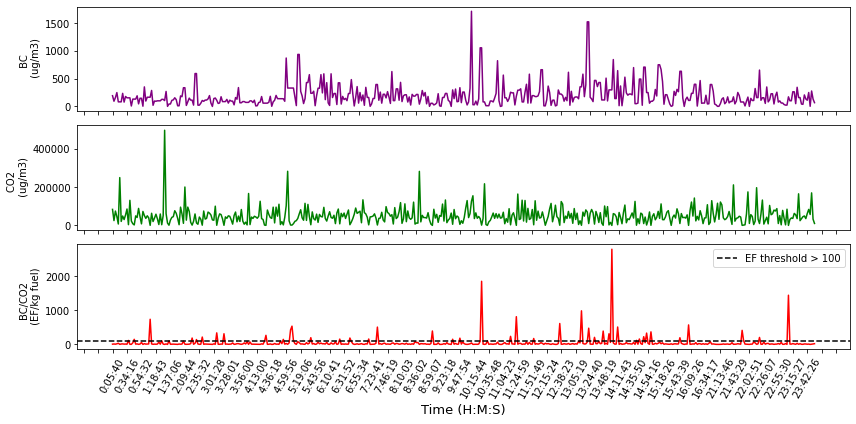

In [38]:

fig, (ax1, ax2, ax3,) = plt.subplots(3, 1, 
                    sharex=True, figsize=(12, 6))
# Add x-axis and y-axis
ax1.plot(df['time2_x'],
         df['BC (ug/m3)'],
         color='purple')
# ax2.plot(app2.index.values,
#        app2['Approx_2'],
#        color='orange')

ax2.plot(df['time2_x'],
         df['CO2 (ug/m3)'],
         color='green')
ax3.plot(df['time2_x'],
         df['BC/CO2 EF/kg fuel'],
         color='red')

# ax5.plot(BC.index.values,
#          BC['BC_app_3'],
#          color='black')

ax1.set(
    ylabel=" BC  \n (ug/m3)")
# ax2.set(ylabel=" App. L2")
ax2.set(ylabel="CO2  \n (ug/m3)")
ax3.set(ylabel="BC/CO2  \n (EF/kg fuel)"),
# plt.plot(x_array, y_array)
plt.xticks(rotation =60) # Rotates X-Axis Ticks by 45-degrees
# plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
# line colour is red
plt.axhline(y = 100, color = 'black', linestyle = 'dashed', 
            label = "EF threshold > 100")  
# plotting the legend
plt.legend()
plt.xlabel('Time (H:M:S)', fontsize = 13)

plt.tight_layout()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.savefig('./Results2/BC_CO2_EF_comparison.png')
plt.show()

